# Cluster Scoring

In [1]:
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:   .p.import`matplotlib.pyplot
fcps:  .p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:  .p.import[`pyclustering.utils]`:read_sample
pydb:  .p.import[`sklearn.metrics]`:davies_bouldin_score
pysil: .p.import[`sklearn.metrics]`:silhouette_score
pydunn:.p.import[`jqmcvi.base]`:dunn_fast /https://github.com/jqmviegas/jqm_cvi
pyhgen:.p.import[`sklearn.metrics]`:homogeneity_score

### Dataset 1

28 581760


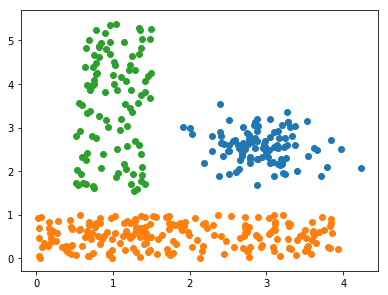

In [2]:
d1:read[fcps`:SAMPLE_LSUN]`
\ts r1:.ml.clust.dbscan[d1;`edist;2;.5]
{plt[`:scatter][;]. flip x}each exec pts by clt from r1;
plt[`:show][];

### Dataset 2

1440 263248


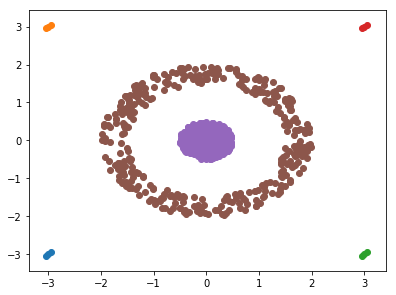

In [3]:
d2:read[fcps`:SAMPLE_TARGET]`
\ts r2:.ml.clust.hc[d2;6;`edist;`single;0b]
{plt[`:scatter][;]. flip x}each exec pts by clt from r2;
plt[`:show][];

---
## Unsupervised Learning

Each of the scoring metrics described below are used in unsupervised learning to analyze how well groups of data have been assigned to clusters. The metrics measure the intra-cluster similarity (cohesion) and inter-cluster differences (separation) of data. It is therefore preferred that clusters are well-spaced and densely packed.

### Davies-Bouldin index
- Minimum of zero, where lower values indicate better clustering.

In [4]:
/q
.ml.clust.daviesbouldin[r1]

/python
pydb[d1;r1`clt]`

0.7135955


/home/deanna/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.7135955


In [5]:
/q
.ml.clust.daviesbouldin[r2]

/python
pydb[d2;r2`clt]`

11.22878


/home/deanna/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


11.22878


---

### Dunn index
- Minimum value of 0, where higher values indicate better clustering.

In [6]:
/q
.ml.clust.dunn[r1;`edist]

/python 
pydunn[r1`pts;raze r1`clt]`

0.1476865


0.1476865


In [7]:
/q
.ml.clust.dunn[r2;`edist]

/python
pydunn[r2`pts;raze r2`clt]`

0.2532991


0.2532991


---

### Silhouette coefficient
A score near:
- +1 indicates correct clustering, with well separated data
- 0 indicates that clusters are close to each other, if not overlapping
- -1 indicates incorrect clustering, possibly with too many clusters have been created

In [8]:
/q
.ml.clust.silhouette[r1;`edist;1b]

/python
pysil[d1;raze r1`clt]`

0.4758694


0.4758694


In [9]:
/q
.ml.clust.silhouette[r2;`edist;1b]

/python
pysil[d2;raze r2`clt]`

0.2952083


0.2952083


---

## Supervised Learning

### Homogeneity Score

When the correct cluster for each data point is known, the true and predicted values can be compared using a homogeneity score. This scoring metric returns a value between 0 and 1, where 1 indicates correct clustering.

In [10]:
show true1:r1`clt
show pred1:count[r1]?til 3

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1..
0 0 2 1 2 1 2 2 1 0 1 2 2 1 0 1 2 0 1 1 2 0 1 2 1 2 1 0 0 1 2 1 2 0 0 2 0 1 0..


In [11]:
/q
.ml.clust.homogeneity[pred1;true1]
.ml.clust.homogeneity[true1;true1]

/python
pyhgen[true1;pred1]`
pyhgen[true1;true1]`

0.002406502


1f


0.002406502


1f


In [12]:
show true2:raze r2`clt
show pred2:count[r2]?til 6

0 1 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4..
4 0 2 2 0 3 4 5 4 5 0 0 1 4 5 5 1 1 4 3 1 2 0 5 1 2 1 4 5 3 4 2 5 0 2 4 3 0 0..


In [13]:
/q
.ml.clust.homogeneity[pred2;true2]
.ml.clust.homogeneity[true2;true2]

/python
pyhgen[true2;pred2]`
pyhgen[true2;true2]`

0.0224055


1f


0.0224055


1f


---

## Optimum Number of Clusters

### Elbow Method

The elbow method is used to find the optimum number of clusters for data grouped using k-means clustering. k-means is applied to a dataset for a range of k values and the average score for each set of clusters is calculated. Traditionally, the distortion score is used in the elbow method. This score calculates the sum of square distances from each point to its assigned center.

Plotting the average cluster score against the k values, the line graph produced will resemble an arm, where the value at the elbow indicates the optimum number of clusters for the chosen dataset.

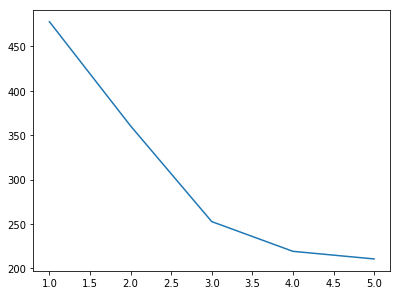

In [14]:
plt[`:plot][1_til k;.ml.clust.elbow[d1;`edist;k:6]];
plt[`:show][];

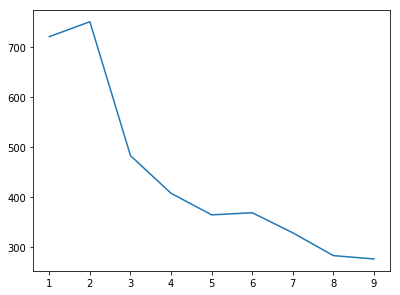

In [15]:
plt[`:plot][1_til k;.ml.clust.elbow[d2;`edist;k:10]];
plt[`:show][];

---